# IMU + GPS noise analysis

This notebook investigates the noise of IMU + GPS data collected whilst the device was stationary for a period of time.

In [747]:
# Imports
import os
import csv
import datetime
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [748]:
# Load data
session_uuid = "2ac38da9-c8bc-4227-974a-bbe242006df4"

# IMU data
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_imu_data_processed = parent_path + "/datasets/" + "session-" + session_uuid + "/imu_data/processed/"

timestamp = pd.read_csv(path_to_imu_data_processed + "timestamp.csv")
attitude = pd.read_csv(path_to_imu_data_processed + "attitude.csv")
gravity = pd.read_csv(path_to_imu_data_processed + "gravity.csv")
magnetic_field = pd.read_csv(path_to_imu_data_processed + "magnetic_field.csv")
rotational_rate = pd.read_csv(path_to_imu_data_processed + "rotational_rate.csv")
user_acceleration = pd.read_csv(path_to_imu_data_processed + "user_acceleration.csv")

# GPS data
parent_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
path_to_gps_data = parent_path + "/datasets/" + "session-" + session_uuid + "/gps_data/gps.csv"
gps_data = pd.read_csv(path_to_gps_data)

timestamp.unstack()

time  0        2022-02-16:12:01:03.913
      1        2022-02-16:12:01:03.938
      2        2022-02-16:12:01:03.952
      3        2022-02-16:12:01:03.971
      4        2022-02-16:12:01:03.991
                        ...           
      12439    2022-02-16:12:05:11.606
      12440    2022-02-16:12:05:11.626
      12441    2022-02-16:12:05:11.646
      12442    2022-02-16:12:05:11.666
      12443    2022-02-16:12:05:11.686
Length: 12444, dtype: object

# Processed IMU data vs time

<AxesSubplot:>

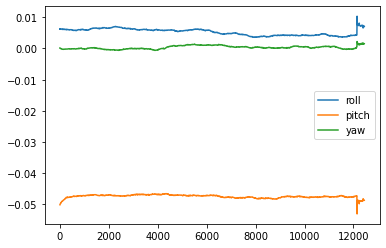

In [749]:
attitude.cumsum()
attitude.plot()

<AxesSubplot:>

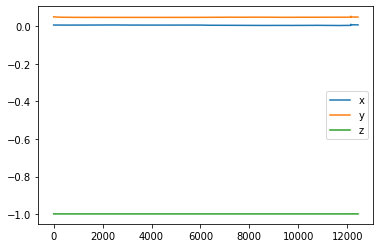

In [750]:
gravity.cumsum()
gravity.plot()

<AxesSubplot:>

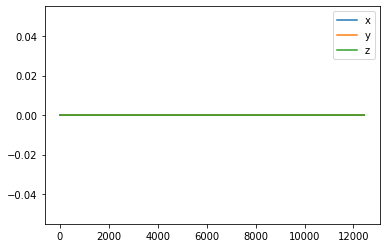

In [751]:
magnetic_field.cumsum()
magnetic_field.plot()

<AxesSubplot:>

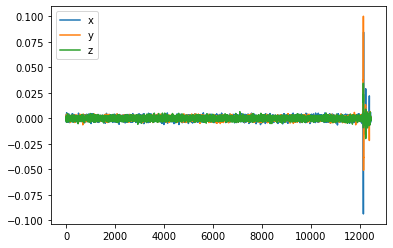

In [752]:
rotational_rate.cumsum()
rotational_rate.plot()

<AxesSubplot:>

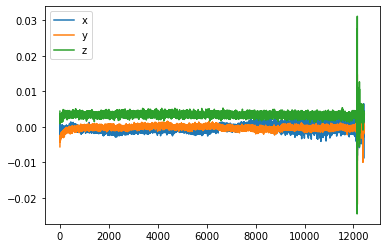

In [753]:
user_acceleration.cumsum()
user_acceleration.plot()

# Noise of processed IMU data

In [754]:
def plot_distribution(data, key, plot_title, path_to_csv_file=None):
    """
    Gaussian distribution plots
    
    """
    size = len(data)

    # CSV writer
    if path_to_csv_file != None:
        csv_file = open(path_to_csv_file, 'w')
        writer = csv.writer(csv_file)

        # Write header
        writer.writerow([
            key[0]+"_mean", key[0] + "_std", 
            key[1]+"_mean", key[1] + "_std", 
            key[2]+"_mean", key[2] + "_std", 
        ])

    values_for_csv_file = []
    colours = ['tab:blue', 'tab:orange', 'tab:green']
    for i in range(size):
        mu, sigma = data[i].mean(), data[i].std()
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)         
        
        plt.plot(x, stats.norm.pdf(x, mu, sigma), color=colours[i], label=key[i])
   
        print(i, f"\t[{key[i]}] Ave: ", mu)
        print(i, f"\t[{key[i]}]  Std: ", sigma)

        values_for_csv_file.append(mu)
        values_for_csv_file.append(sigma)
    
    if path_to_csv_file != None:
        # Write mean/std values
        writer.writerow(values_for_csv_file)
        
        # Close the CSV file
        csv_file.close()

    plt.title(plot_title)
    plt.legend()

    
    
        

0 	[roll] Ave:  0.005261081376439061
0 	[roll]  Std:  0.0010417155904759439
1 	[pitch] Ave:  -0.04744085253264111
1 	[pitch]  Std:  0.0005040459858788949
2 	[yaw] Ave:  0.000333083066604184
2 	[yaw]  Std:  0.0005077737866087125


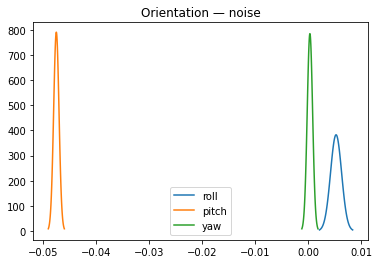

In [755]:
# Attitude
plot_distribution(
    data=[attitude['roll'], attitude['pitch'], attitude['yaw']],
    key=["roll", 'pitch', 'yaw'], 
    plot_title="Orientation — noise"
)


0 	[x] Ave:  0.005255141813355552
0 	[x]  Std:  0.00104055484586294
1 	[y] Ave:  0.047423053145760646
1 	[y]  Std:  0.0005034687967957234


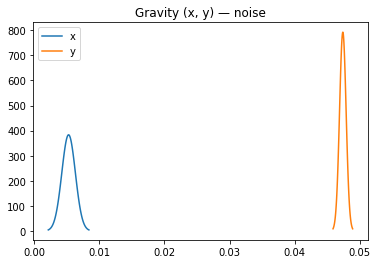

In [756]:
# Gravity (x, y)
plot_distribution(
    data=[gravity['x'], gravity['y']],
    key=["x", 'y', 'z'],
    plot_title="Gravity (x, y) — noise"
)


0 	[z] Ave:  -0.9988604011603852
0 	[z]  Std:  2.3350567579237012e-05


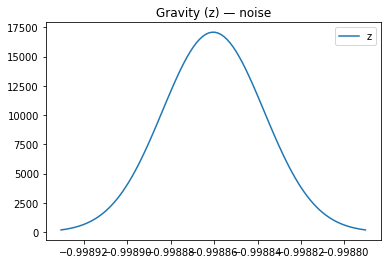

In [757]:
# Gravity (z)
plot_distribution(
    data=[gravity['z']],
    key=['z'],
    plot_title="Gravity (z) — noise"
)

0 	[x] Ave:  -0.0004205489223375195
0 	[x]  Std:  0.0009366977576619936
1 	[y] Ave:  -0.00027830246356962173
1 	[y]  Std:  0.0006757213908576192
2 	[z] Ave:  0.0033647094085950983
2 	[z]  Std:  0.0008078107591169871


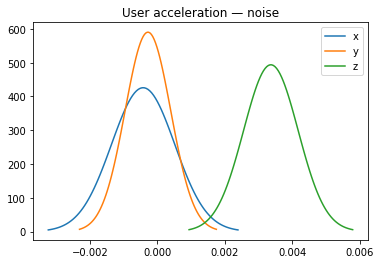

In [758]:
# User acceleration (x, y, z)
plot_distribution(
    data=[user_acceleration['x'], user_acceleration['y'], user_acceleration['z']],
    key=["x", 'y', 'z'], 
    plot_title="User acceleration — noise", 
    path_to_csv_file=path_to_imu_data_processed+"user_acceleration_noise.csv"
)



# GPS data vs time 


In [759]:
def meters_to_coordinate_degrees(m):
    """
    A quick estimate of meters in terms of degrees. 
    
    return: new lat/long coordinates
    """

    lat = m / 111111.0
    long = m / (111111.0 * np.cos(lat))

    return lat/2.0, long/2.0



Latitude:	 33.53165521996763
Longitude:	 19.537661949084566
Altitude:	 347.01151512144133
Coordinate uncertainty:	 4.676220173627056
Height uncertainty:	 3.475476572680593


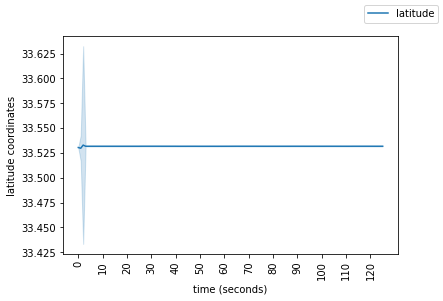

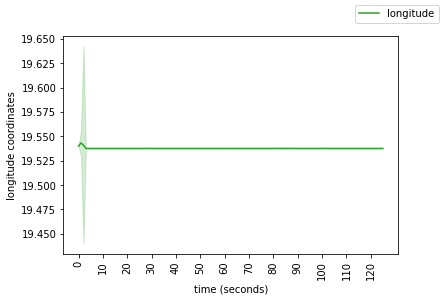

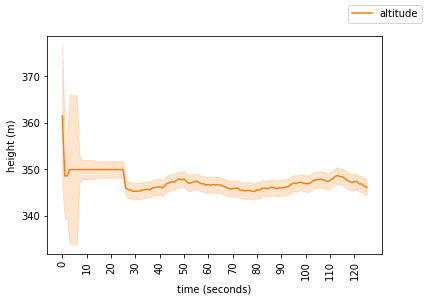

In [760]:



# gps_data.plot(x='timestamp', y='latitude', rot=90, color="tab:blue")
# gps_data.plot(x='timestamp', y='longitude', rot=90, color="tab:green")
# gps_data.plot(x='timestamp', y='altitude', rot=90, color="tab:purple")
# gps_data.plot(x='timestamp', y='horizontalAccuracy', rot=90, color="tab:orange")
# gps_data.plot(x='timestamp', y='verticalAccuracy', rot=90, color="tab:red")

time = gps_data['timestamp'].values
latitude = gps_data['latitude'].values
longitude = gps_data['longitude'].values
altitude = gps_data['altitude'].values
horizontalAccuracy = gps_data['horizontalAccuracy'].values
verticalAccuracy = gps_data['verticalAccuracy'].values

print("Latitude:\t", np.median(latitude))
print("Longitude:\t", np.median(longitude))
print("Altitude:\t", np.median(altitude))
print("Coordinate uncertainty:\t", np.median(horizontalAccuracy))
print("Height uncertainty:\t", np.median(verticalAccuracy))

newTime = []
for i in range(len(time)):
    if i % 10 == 0:
        newTime.append(i)

latitude_accuracy = []
longitude_accuracy = []
for h in horizontalAccuracy:
    lat, long = meters_to_coordinate_degrees(h)
    latitude_accuracy.append(lat)
    longitude_accuracy.append(long)

altitude_accuracy = []
for v in verticalAccuracy:
    altitude_accuracy.append(v/2.0)

# LATITUDE
fig,ax=plt.subplots()
ax.plot(time, latitude, color="tab:blue")
ax.set_xlabel("time (seconds)")
ax.set_ylabel("latitude coordinates")
plt.fill_between(time, latitude - latitude_accuracy, latitude + latitude_accuracy, color='tab:blue', alpha=0.2)

plt.xticks(newTime, newTime, rotation='vertical')
fig.legend(["latitude"])

# LONGITUDE
fig,ax=plt.subplots()
ax.plot(time, longitude, color="tab:green")
ax.set_xlabel("time (seconds)")
ax.set_ylabel("longitude coordinates")
plt.fill_between(time, longitude - longitude_accuracy, longitude + longitude_accuracy, color='tab:green', alpha=0.2)

plt.xticks(newTime, newTime, rotation='vertical')
fig.legend(["longitude"])

# Altitude 
fig,ax=plt.subplots()
ax.plot(time, altitude, color="tab:orange")
ax.set_xlabel("time (seconds)")
ax.set_ylabel("height (m)")
plt.fill_between(time, altitude - altitude_accuracy, altitude + altitude_accuracy, color='tab:orange', alpha=0.2)

plt.xticks(newTime, newTime, rotation='vertical')
fig.legend(["altitude"])






# TODO: Plot position estimate in 3D space: